<a href="https://colab.research.google.com/github/gyujin0450/RPRG_PartII/blob/master/p233_%EA%B2%A9%EC%9E%90%ED%98%95%EA%B8%B0%EB%B2%95%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch08.2 격자형 기법 시각화

In [5]:
# 1) lattice 패키지 설치
install.packages("lattice")
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# 2) 실습용 데이터 가저오기
install.packages("mlmRev")
library(mlmRev)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lme4’


Loading required package: lme4

Loading required package: Matrix



In [7]:
data(Chem97) 
str(Chem97)

'data.frame':	31022 obs. of  8 variables:
 $ lea      : Factor w/ 131 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ school   : Factor w/ 2410 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ student  : Factor w/ 31022 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ score    : num  4 10 10 10 8 10 6 8 4 10 ...
 $ gender   : Factor w/ 2 levels "M","F": 2 2 2 2 2 2 2 2 2 2 ...
 $ age      : num  3 -3 -4 -2 -1 4 1 4 3 0 ...
 $ gcsescore: num  6.62 7.62 7.25 7.5 6.44 ...
 $ gcsecnt  : num  0.339 1.339 0.964 1.214 0.158 ...


In [8]:
# ?Chem97
# lea Local Education Authority - a factor
# school School identifier - a factor
# student Student identifier - a factor
# score Point score on A-level Chemistry in 1997
# gender Student's gender 
# age Age in month, centred at 222 months or 18.5 years : 18.5세 기준 개월
# gcsescore Average GCSE score of individual.
# gcsecnt Average GCSE score of individual, centered at mean.

In [9]:
head(Chem97)

,lea,school,student,score,gender,age,gcsescore,gcsecnt
,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,F,3,6.625,0.3393157
2,1,1,2,10,F,-3,7.625,1.3393157
3,1,1,3,10,F,-4,7.250,0.9643157
4,1,1,4,10,F,-2,7.500,1.2143157
5,1,1,5,8,F,-1,6.444,0.1583157
6,1,1,6,10,F,4,7.750,1.4643157


In [10]:
table(Chem97$gender)


    M     F 
17262 13760 

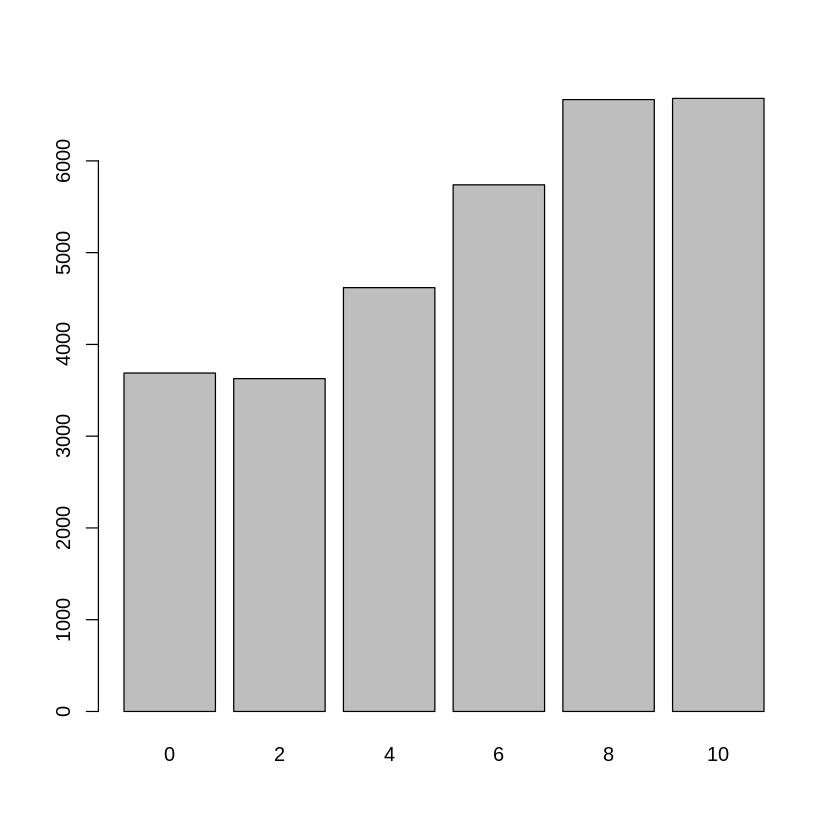

In [11]:
barplot(table(Chem97$score))

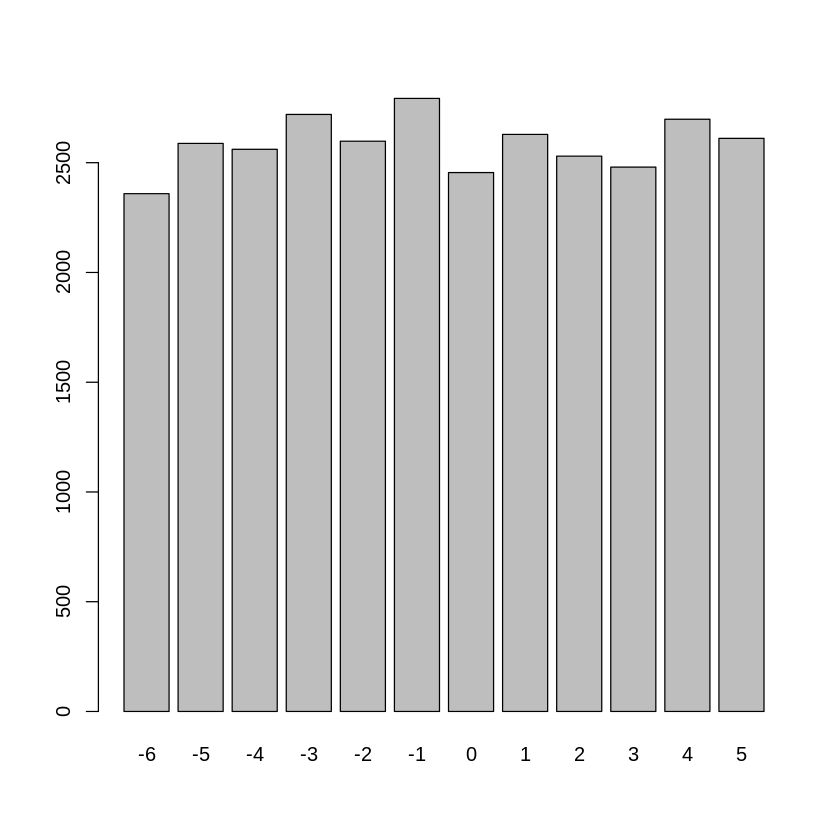

In [12]:
barplot(table(Chem97$age))

평균: 6.285684

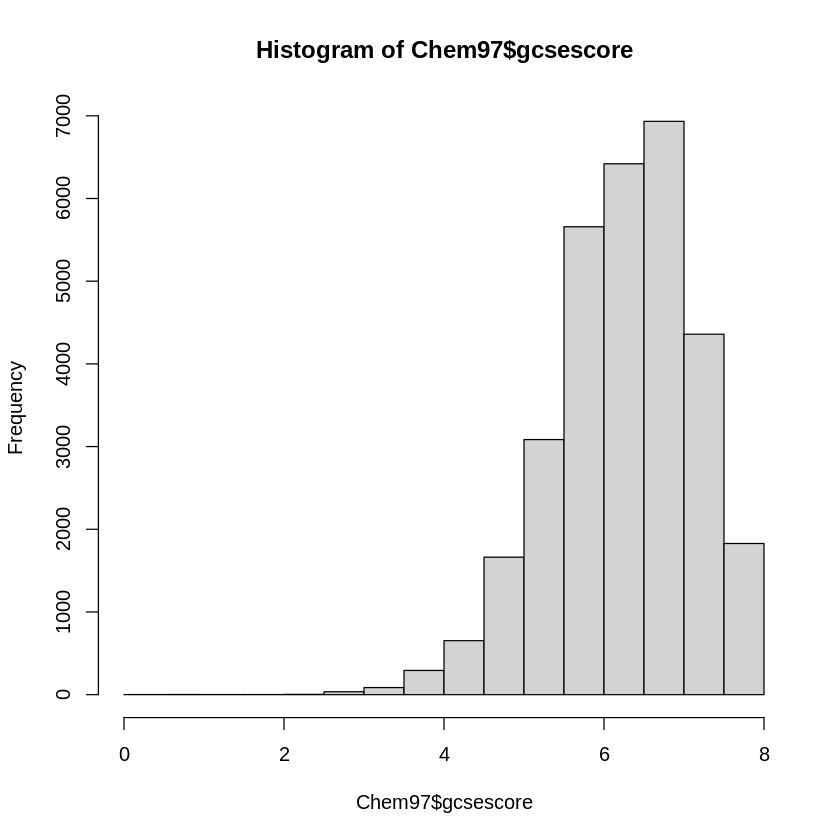

In [13]:
# barplot(table(Chem97$gcsescore))
hist(Chem97$gcsescore)
cat("평균:",mean(Chem97$gcsescore))

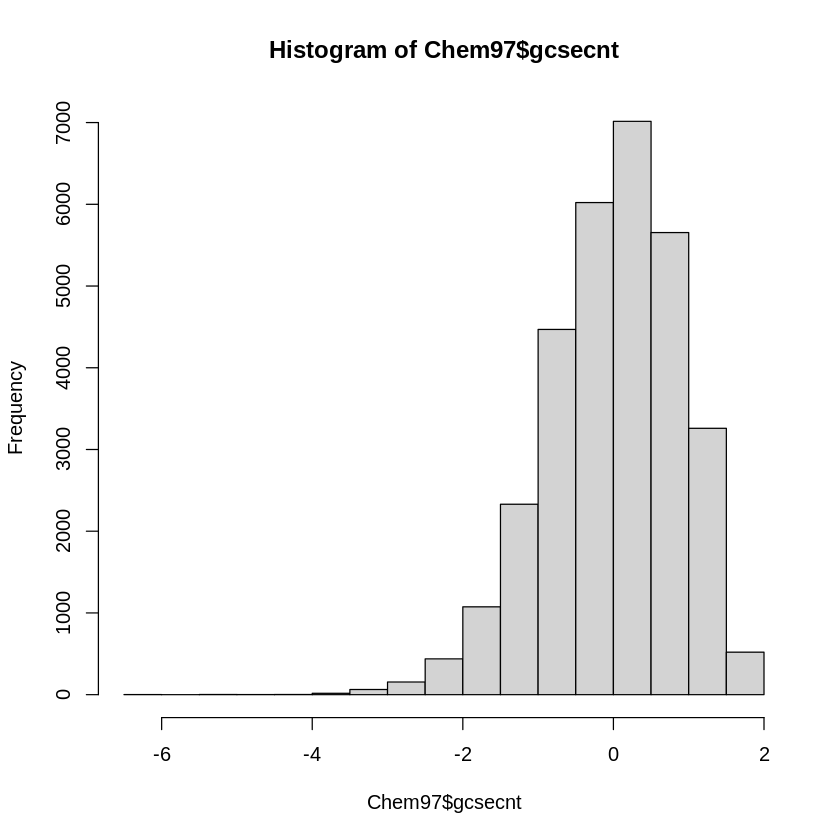

In [14]:
hist(Chem97$gcsecnt)

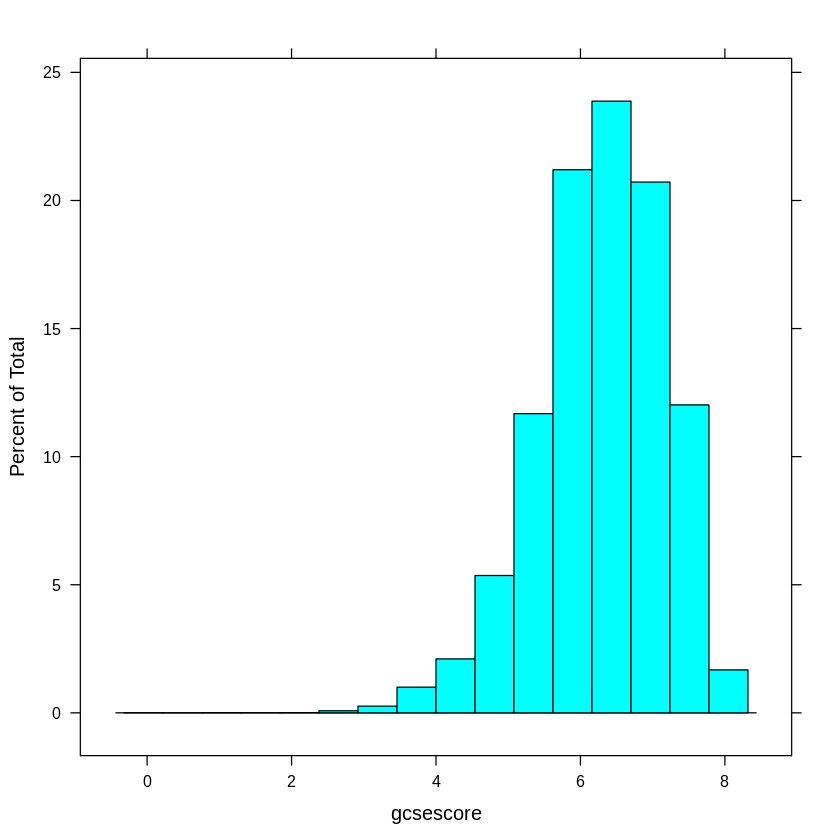

In [15]:
# 2.1) 히스토그램
# histogram(~ X축 컬럼 | 조건, data ...)
histogram(~gcsescore, data = Chem97) 

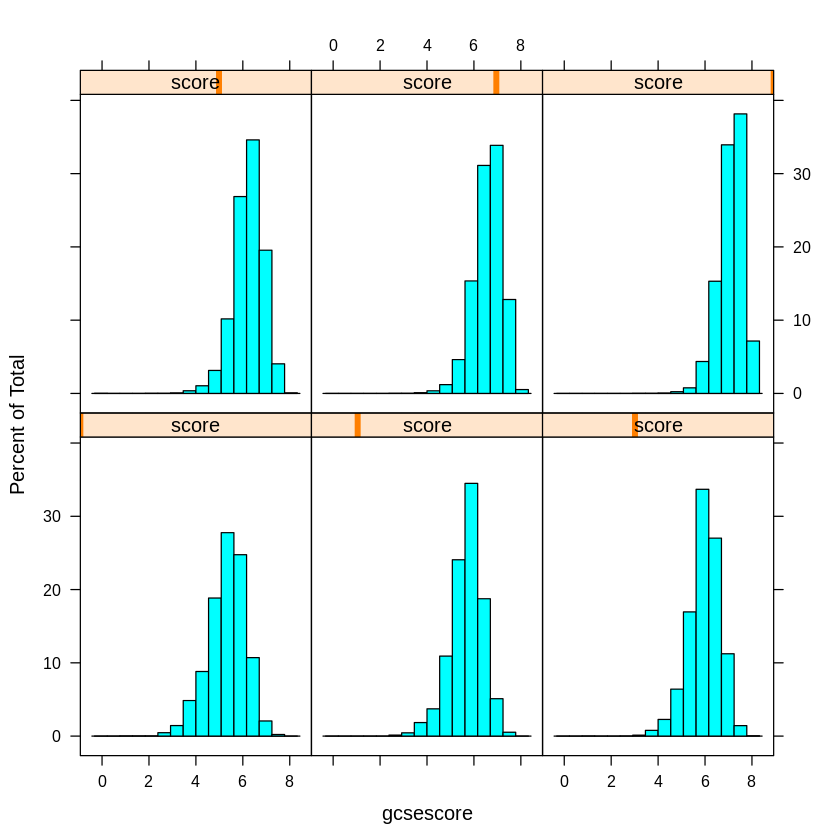

In [16]:
# Score 변수를 조건 변수로 지정하여 데이터 시각화
histogram(~gcsescore | score, data = Chem97)

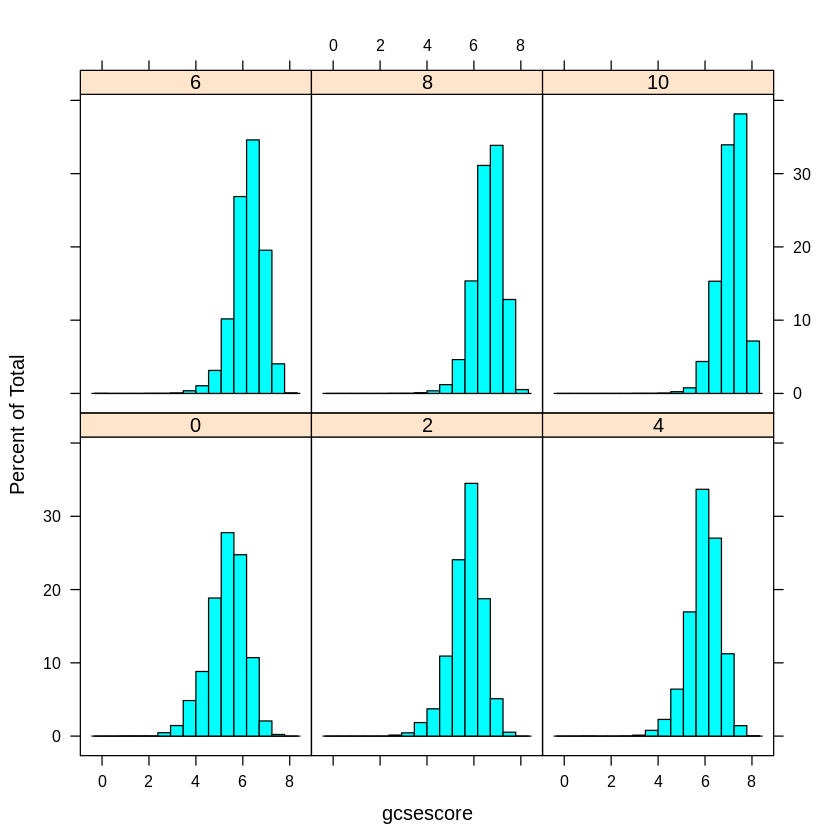

In [17]:
histogram(~gcsescore | factor(score), data = Chem97)

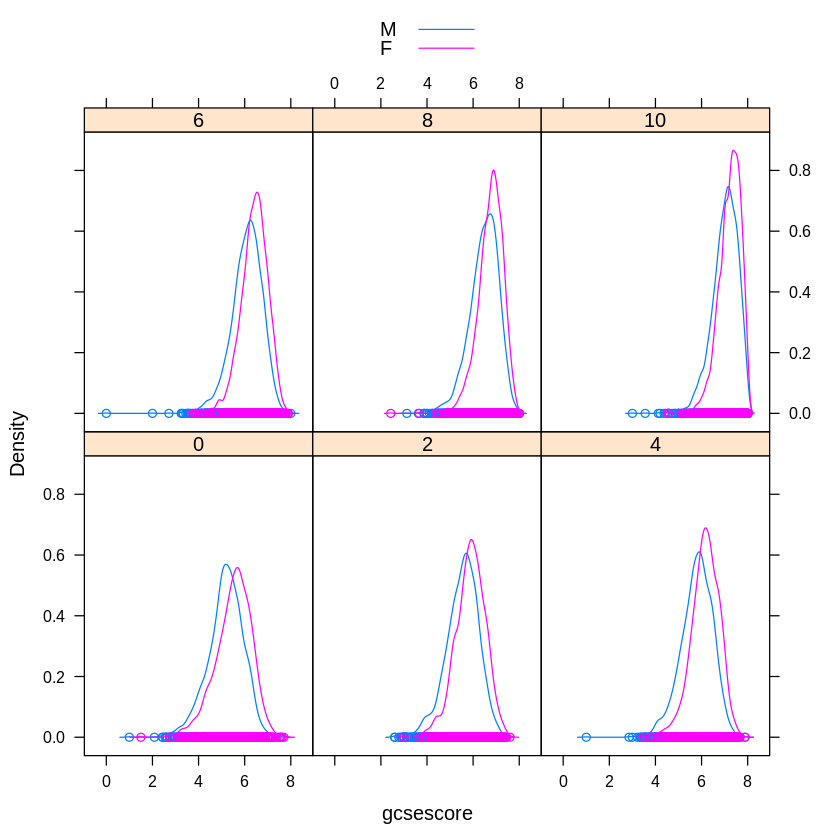

In [18]:
# 2.2) 밀도 그래프
# densityplot(~ x축 컬럼 | 조건, data, groups = 변수)
densityplot(~gcsescore | factor(score), data = Chem97, groups = gender, 
            plot.points = T, auto.key = T)

In [19]:
# 막대 그래프
# barchart(y축 컬럼 ~x축 컬럼 | 조건, data, layout)

In [20]:
# 1) 기본 데이터셋 가저오기
data(VADeaths)
str(VADeaths)

 num [1:5, 1:4] 11.7 18.1 26.9 41 66 8.7 11.7 20.3 30.9 54.3 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5] "50-54" "55-59" "60-64" "65-69" ...
  ..$ : chr [1:4] "Rural Male" "Rural Female" "Urban Male" "Urban Female"


In [21]:
VADeaths

,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


In [22]:
class(VADeaths) # class : data 구조 확인(자료형: vector(numeric, character), matrix, data.frame, list, factor)
mode(VADeaths)  # mode : 객체의 내부 타입(numeric, character, list)

[1] "matrix" "array"

[1] "numeric"

In [23]:
# 통계처리를 위해서 matrix 자료 구조를 table 자료구조로 변환
# 가장 왼쪽의 첫번째 컬럼을 기준으로 '넓은 형식'의 자료가 '긴 형식'의 자료로 구조가 변경
dft <- as.data.frame.table(VADeaths)
str(dft)

'data.frame':	20 obs. of  3 variables:
 $ Var1: Factor w/ 5 levels "50-54","55-59",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ Var2: Factor w/ 4 levels "Rural Male","Rural Female",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ Freq: num  11.7 18.1 26.9 41 66 8.7 11.7 20.3 30.9 54.3 ...


In [24]:
class(dft);mode(dft)

[1] "data.frame"

[1] "list"

In [25]:
dft

Var1,Var2,Freq
<fct>,<fct>,<dbl>
50-54,Rural Male,11.7
55-59,Rural Male,18.1
60-64,Rural Male,26.9
65-69,Rural Male,41.0
70-74,Rural Male,66.0
50-54,Rural Female,8.7
55-59,Rural Female,11.7
60-64,Rural Female,20.3
65-69,Rural Female,30.9


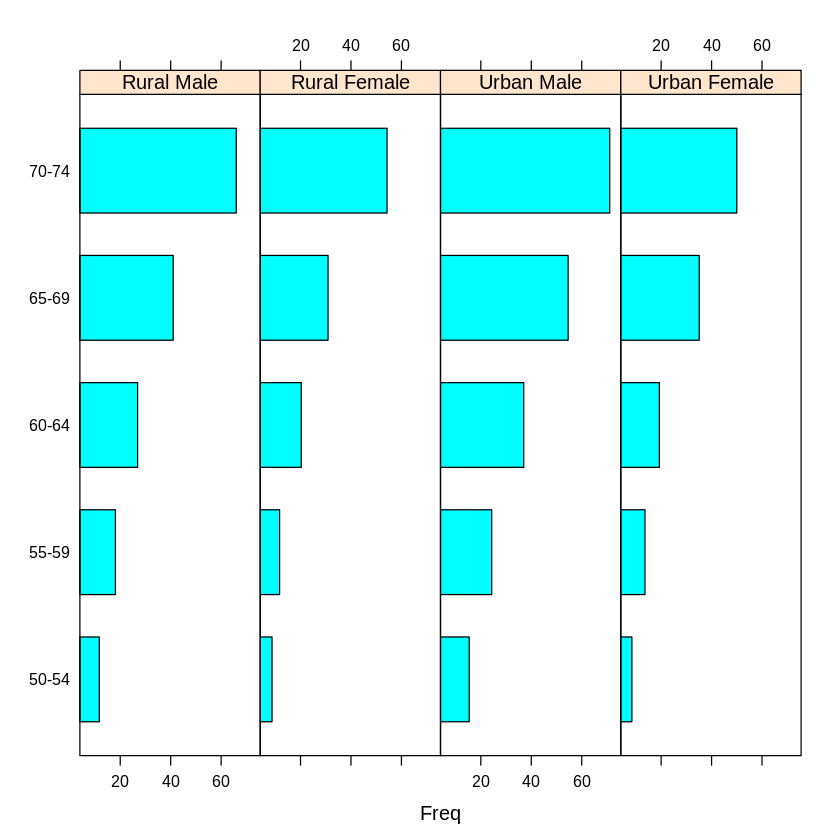

In [26]:
barchart(Var1 ~ Freq | Var2, data = dft, layout = c(4,1)) # 4열 1행

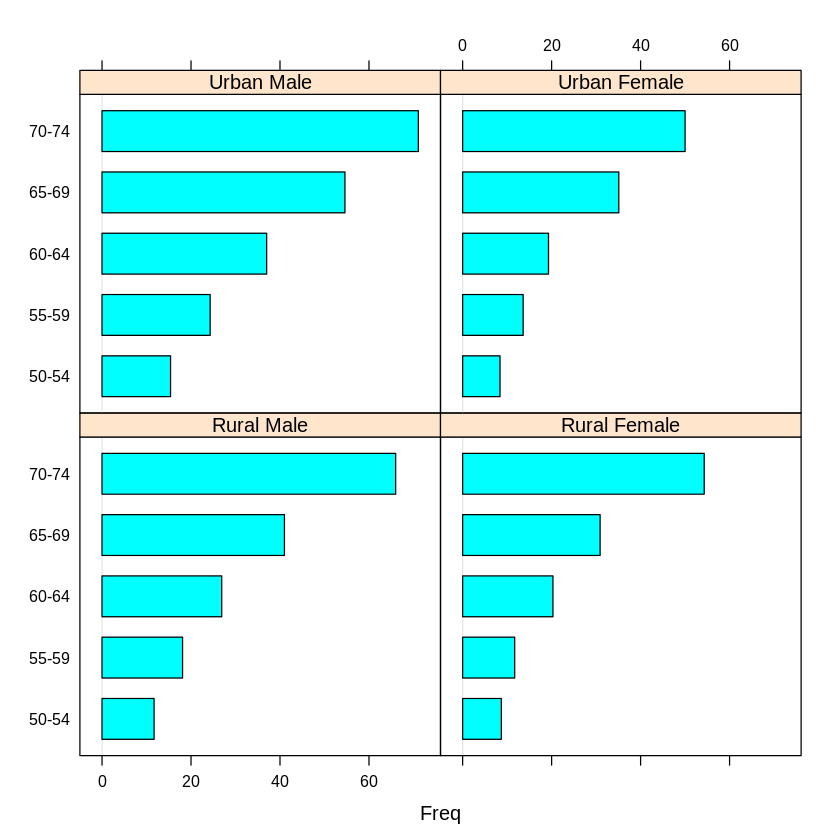

In [27]:
barchart(Var1 ~ Freq | Var2, data = dft, layout = c(2,2), origin = 0) # 2열 2행

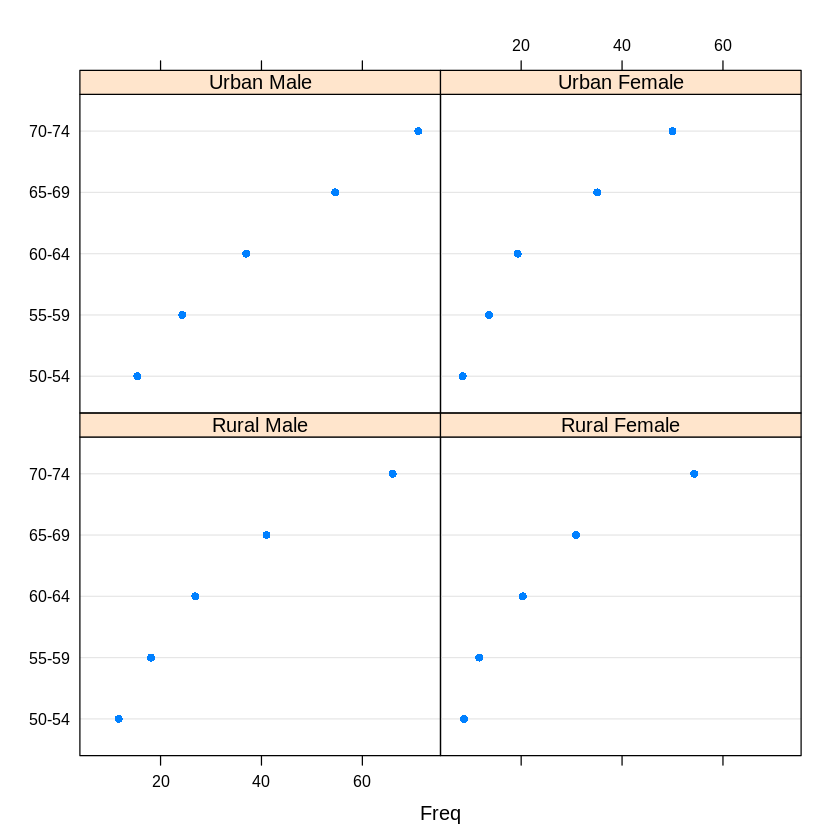

In [28]:
# 점그래프
# dotplot(y축 컬럼 ~ x축 컬럼 | 조건, data, layout)
dotplot(Var1 ~ Freq | Var2, dft)

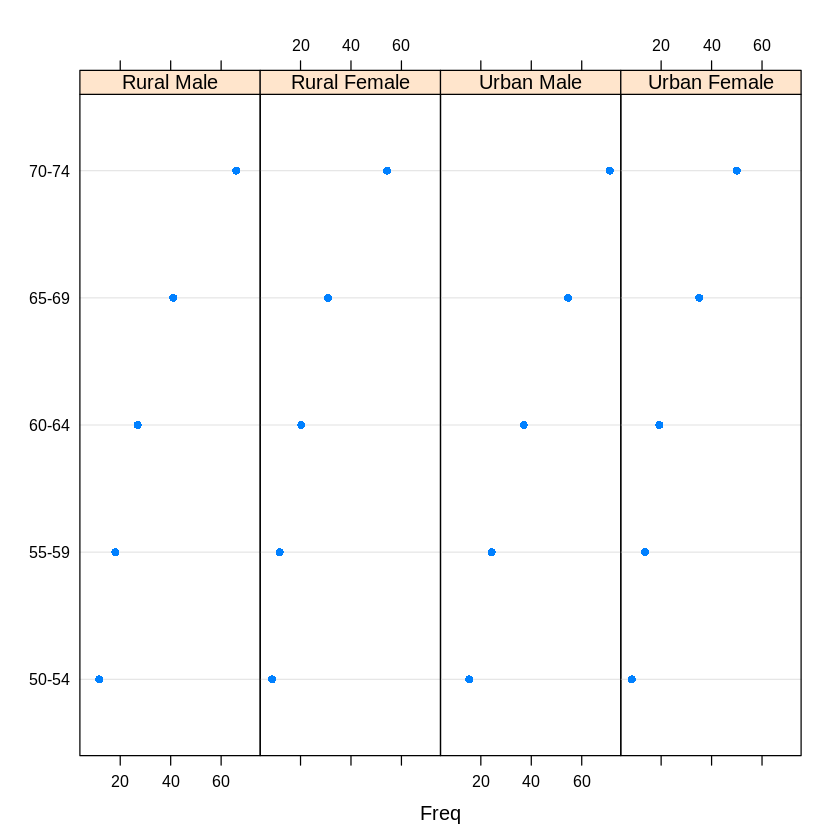

In [29]:
dotplot(Var1 ~ Freq | Var2, dft, layout = c(4,1))

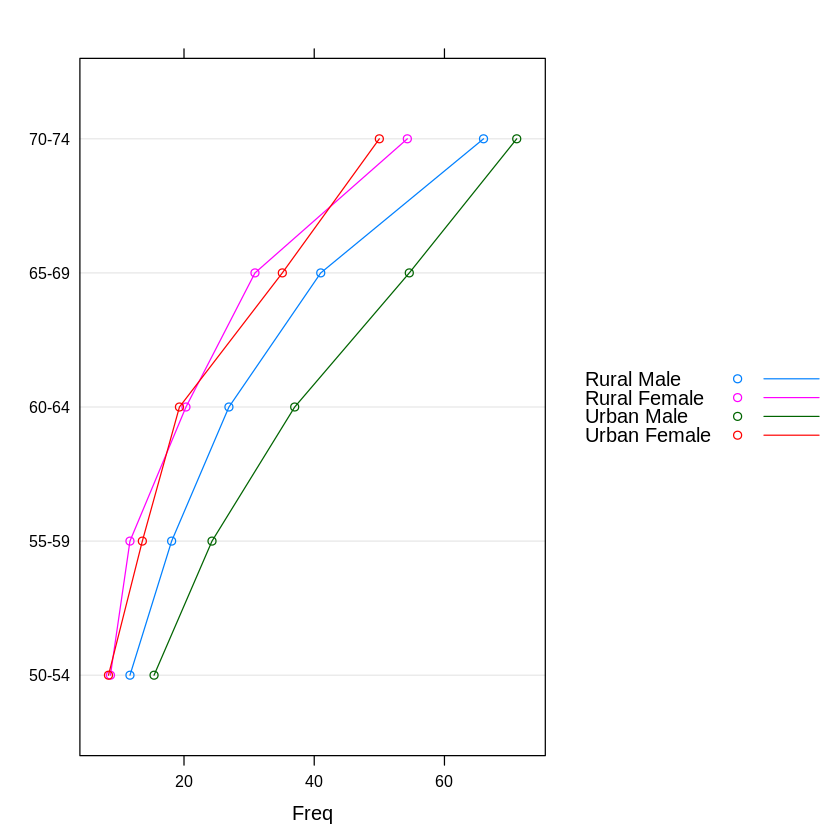

In [30]:
# 점을 선으로 연결하여 시각화
dotplot(Var1 ~ Freq, data = dft, groups = Var2, type = "o",
        auto.key = list(space = "right", points = T, lines = T))

In [31]:
# 산점도 그래프
library(datasets)
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [32]:
# ?airquality
# Ozone   : Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island
# Solar.R : Solar radiation in Langleys in the frequency band 4000-7700 Angstroms from 0800 to 1200 hours at Central Park
# Wind    : Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
# Temp    : Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

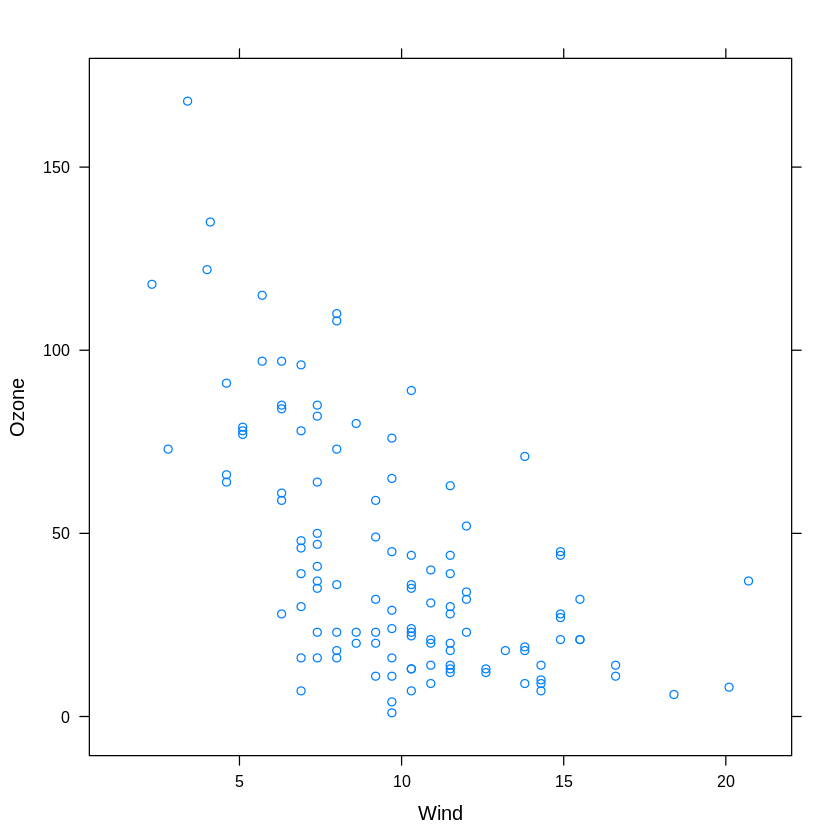

In [33]:
# xyplot() 함수를 사용하여 산점도 그리기
# xyplot(y축 컬럼 ~ x축 컬럼 | 조건변수, data = data.frame 또는 list, layout)
xyplot(Ozone ~ Wind, data= airquality)

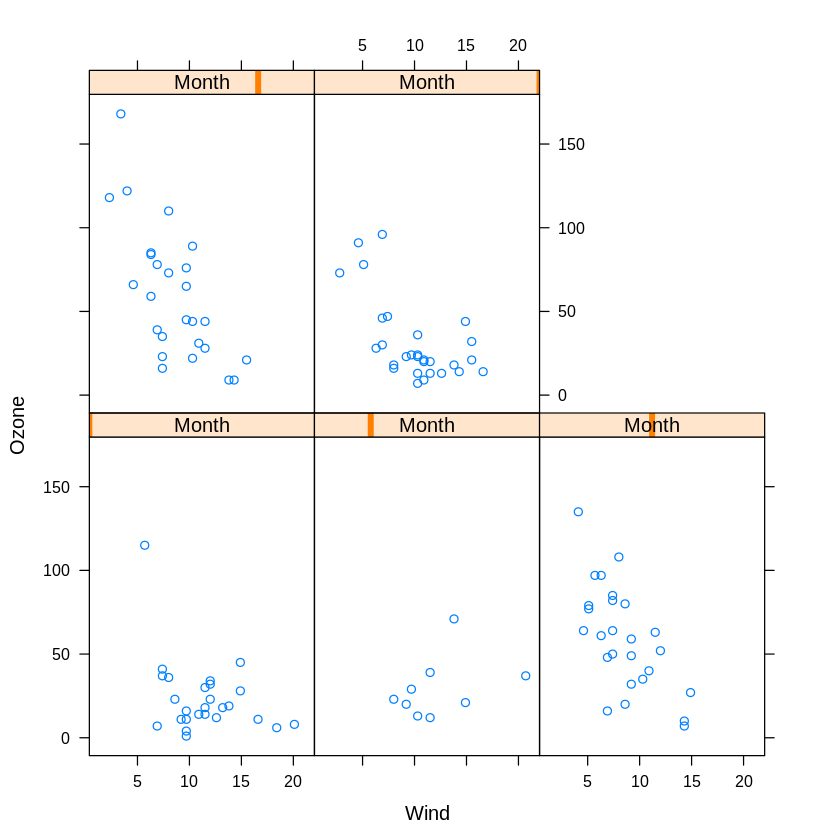

In [34]:
# 조건변수를 사용하는 xyplot() 함수로 산점도 그리기
xyplot(Ozone ~ Wind | Month, data = airquality)

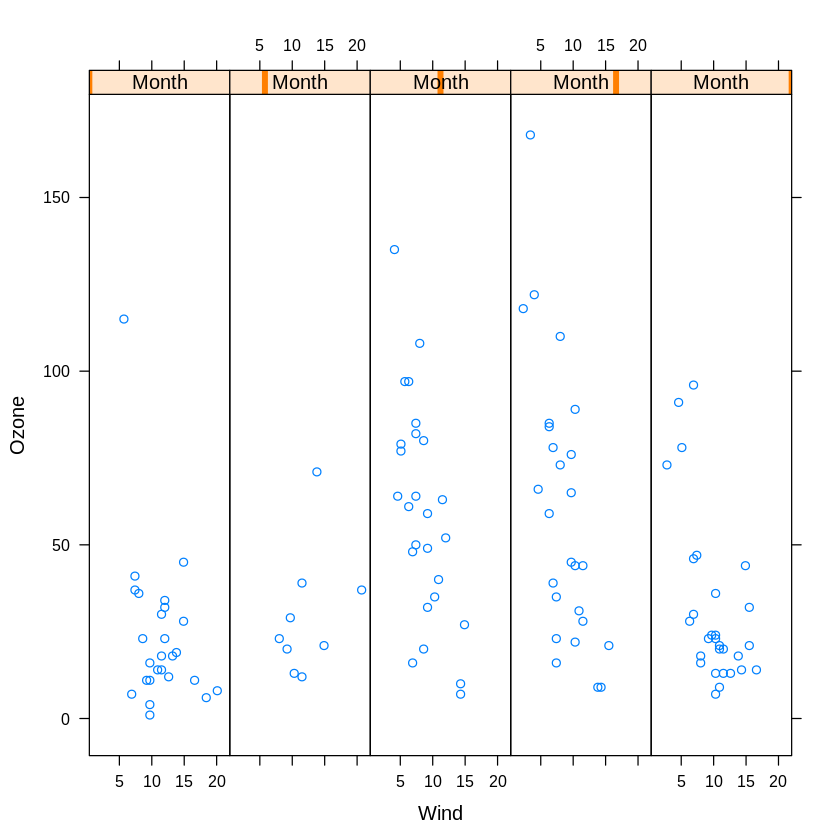

In [35]:
# 조건변수와 layout 속성을 사용하는 xyplot() 함수로 산점도 그리기
xyplot(Ozone ~ Wind | Month, data = airquality, layout = c(5,1))

In [36]:
# Month 변수를 factor 타입으로 변환하여 산점도 그리기
convert <- transform(airquality, Month = factor(Month))
str(convert)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : Factor w/ 5 levels "5","6","7","8",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


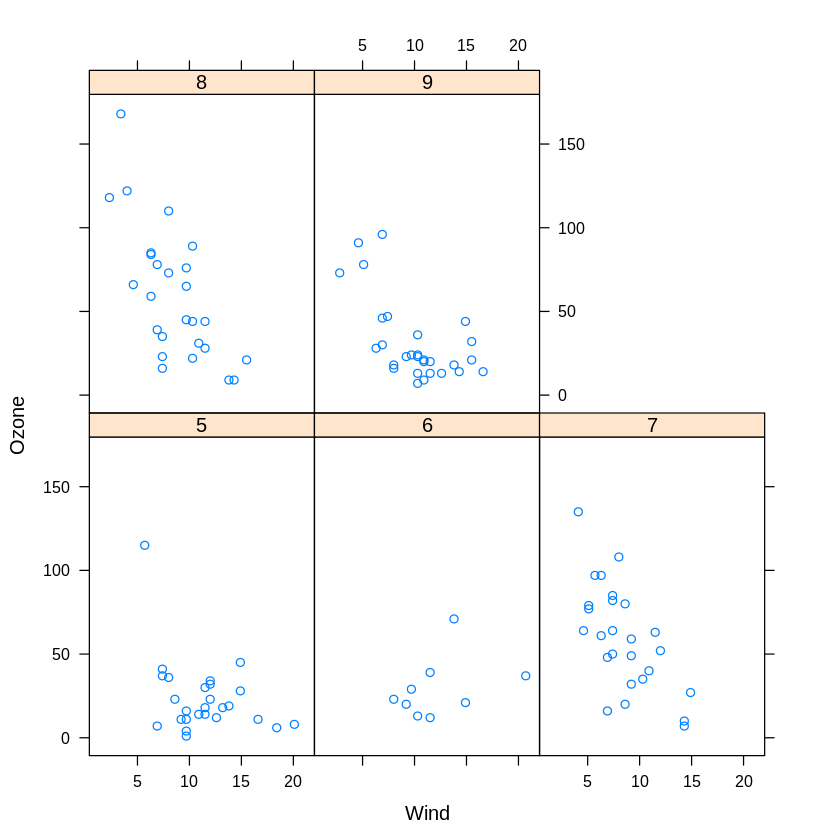

In [37]:
xyplot(Ozone ~ Wind | Month, data = convert)

In [38]:
# quakes 데이터 셋으로 산점도 그래프 그리기
head(quakes)

,lat,long,depth,mag,stations
,<dbl>,<dbl>,<int>,<dbl>,<int>
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
6,-19.68,184.31,195,4.0,12


In [39]:
str(quakes)

'data.frame':	1000 obs. of  5 variables:
 $ lat     : num  -20.4 -20.6 -26 -18 -20.4 ...
 $ long    : num  182 181 184 182 182 ...
 $ depth   : int  562 650 42 626 649 195 82 194 211 622 ...
 $ mag     : num  4.8 4.2 5.4 4.1 4 4 4.8 4.4 4.7 4.3 ...
 $ stations: int  41 15 43 19 11 12 43 15 35 19 ...


In [40]:
# ?quakes
# lat       numeric  Latitude(위도) of event            
# long      numeric  Longitude(경도)                    
# depth     numeric  Depth (km)                   
# mag       numeric  Richter Magnitude(크기)            
# stations  numeric  Number of stations reporting 

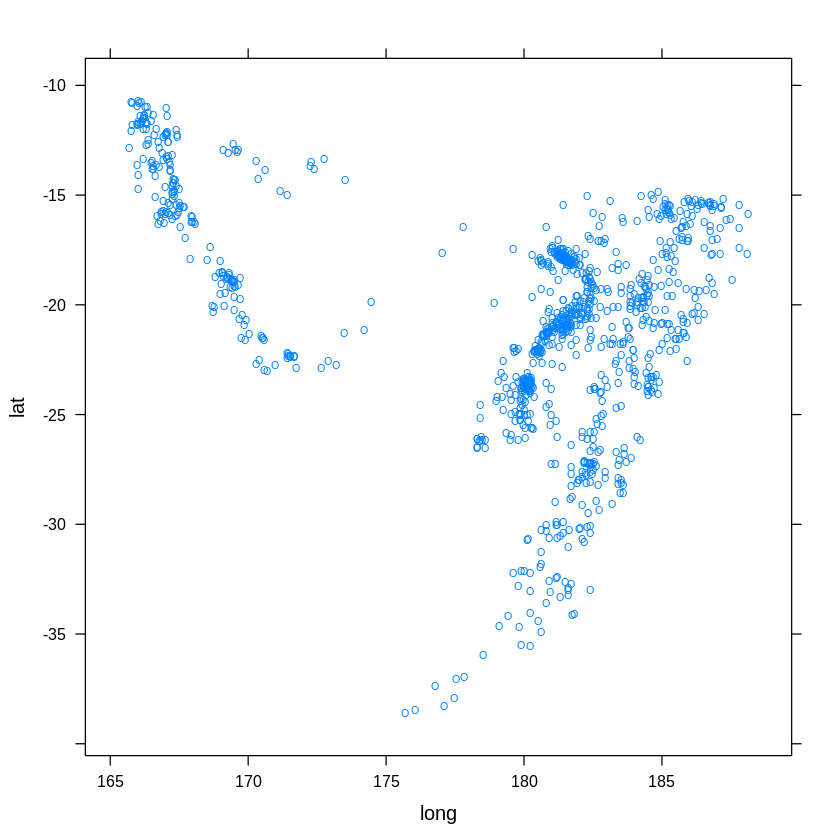

In [41]:
# 지진 발생 진앙지(위도와 경도) 산점도 그리기
xyplot(lat ~ long, data = quakes, pch = "O")

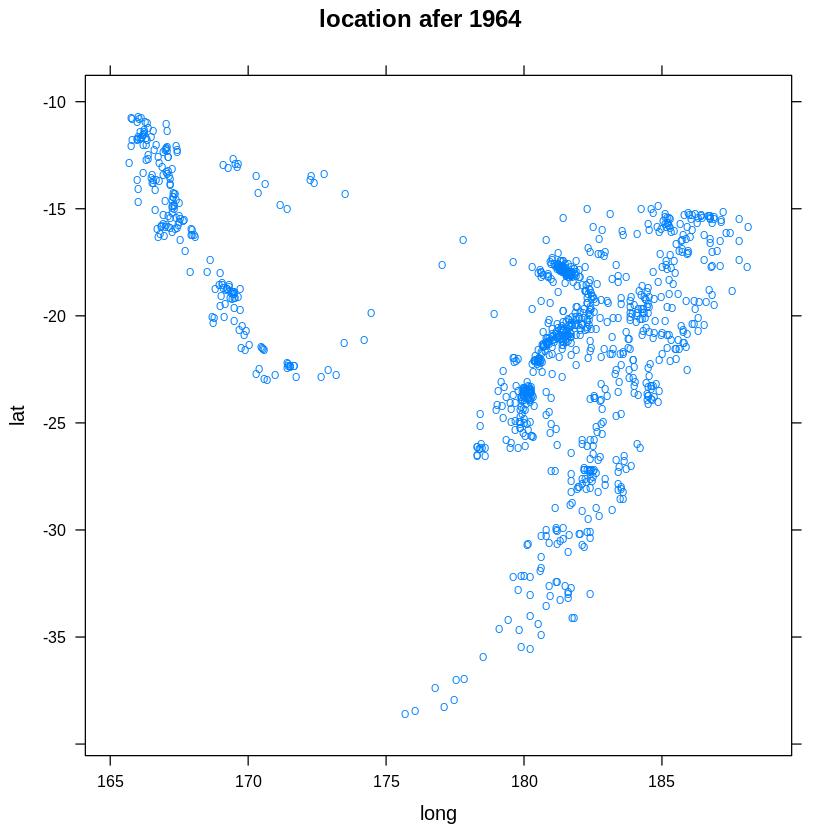

In [42]:
# 산점도 그래프를 변수에 저장하고, 제목 문자열 추가하기
tplot <- xyplot(lat ~ long, data = quakes, pch = "O")
tplot <- update(tplot, main = "location afer 1964")
print(tplot)

In [43]:
# 이산형 변수를 조건으로 지정하여 산점도 그리기
# 1) depth 변수의 범위 확인
range(quakes$depth)

[1]  40 680

In [44]:
# 2) depth 변수 리코딩 : 6개의 범주(100 단위)로 코딩 변경
quakes$depth2[quakes$depth >= 40 & quakes$depth <= 150] <- 1
quakes$depth2[quakes$depth >= 151 & quakes$depth <= 250] <- 2
quakes$depth2[quakes$depth >= 251 & quakes$depth <= 350] <- 3
quakes$depth2[quakes$depth >= 351 & quakes$depth <= 450] <- 4
quakes$depth2[quakes$depth >= 451 & quakes$depth <= 550] <- 5
quakes$depth2[quakes$depth >= 551 & quakes$depth <= 680] <- 6

In [45]:
str(quakes)

'data.frame':	1000 obs. of  6 variables:
 $ lat     : num  -20.4 -20.6 -26 -18 -20.4 ...
 $ long    : num  182 181 184 182 182 ...
 $ depth   : int  562 650 42 626 649 195 82 194 211 622 ...
 $ mag     : num  4.8 4.2 5.4 4.1 4 4 4.8 4.4 4.7 4.3 ...
 $ stations: int  41 15 43 19 11 12 43 15 35 19 ...
 $ depth2  : num  6 6 1 6 6 2 1 2 2 6 ...


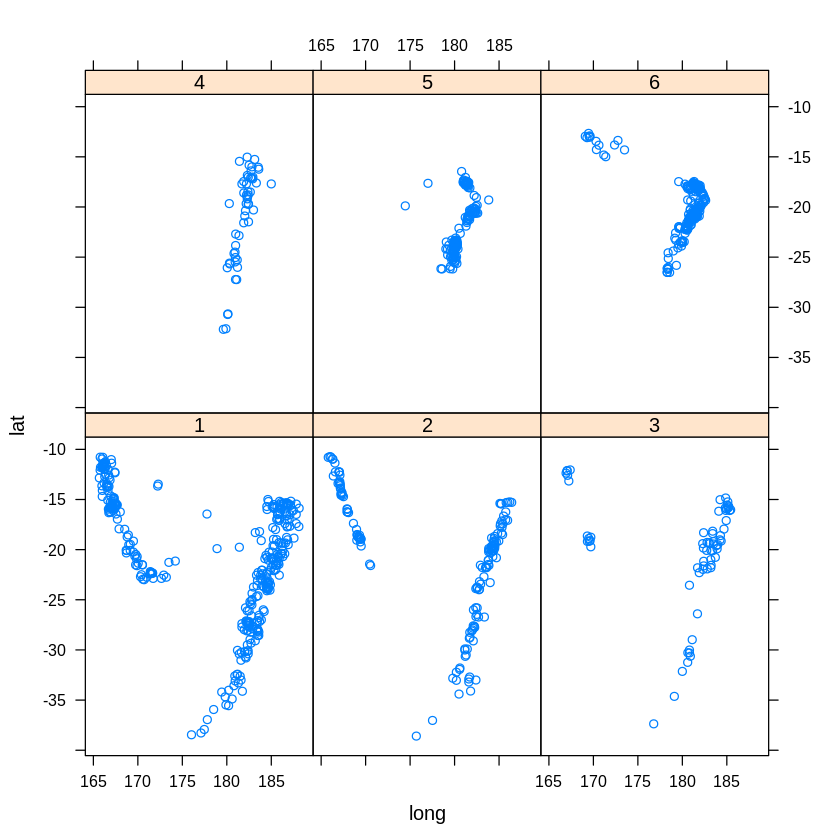

In [46]:
# 3) 리코딩된 변수(depth2)를 조건으로 산점도 그리기
convert <- transform(quakes, depth2 = factor(depth2))
xyplot(lat ~ long | depth2, data = convert)

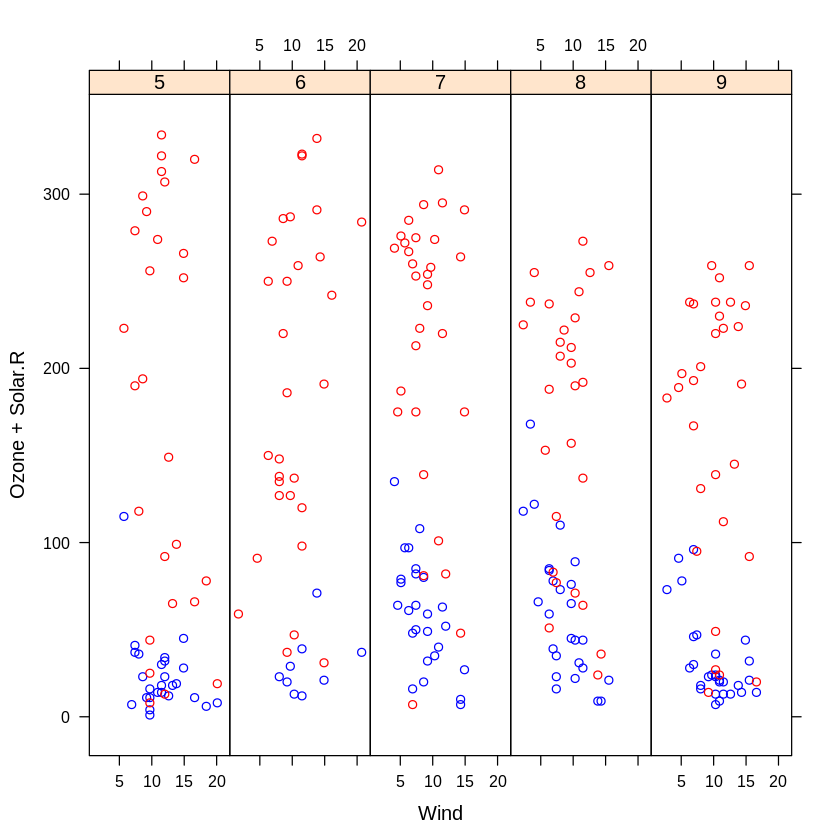

In [47]:
# 동일한 패널에 두개의 변수값 표현
xyplot(Ozone + Solar.R ~ Wind | factor(Month), data = airquality, col = c("blue", "red"), layout = c(5,1))

In [60]:
# 데이터 범주화
# equal.count(data, number = n, overlap = 0)
# 1) 1 ~ 150을 대상으로 겹치지 않게 4개 영역으로 범주화
# numgroup <- equal.count(1:150, number = 4)
# overlap = 0 으로 해여 중첩하지 않늠
numgroup <- equal.count(1:150, number = 4, overlap = 0)
numgroup


Data:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

Intervals:
    min   max count
1   0.5  38.5    38
2  37.5  75.5    38
3  75.5 112.5    37
4 113.5 150.5    37

Overlap between adjacent intervals:
[1] 1 0 0

In [61]:
depthgroup <- equal.count(quakes$depth,number = 6,overlap = 0)
depthgroup


Data:
   [1] 562 650  42 626 649 195  82 194 211 622 583 249 554 600 139 306  50 590
  [19] 570 598 576 211 512 125 431 537 155 498 582 328 553  50 292 349  48 600
  [37] 206 574 585 230 263  96 511  94 246  56 329  70 493 129 554 223  46 593
  [55] 489 562 445 584 535 530 582 260 613  84 593 286 587 627 530  40 152 201
  [73]  96 506 546 564 197 265 323 304  75 367 579 284 450 170 117 538 123  69
  [91] 128 236 497 271 224 375 365 306  50 484 108 583 608  72 636 293  42 100
 [109]  42 146 280 388 477 617 606 609  46  64 178 248  82  81 606 571 328  49
 [127] 517 600  94 307 189 527  63 510 624  53  42 199 149 210 658 582 220 205
 [145] 614 186  97  48 462 573  56 127 229 112 140 597  69 452  93 103 626 504
 [163] 202  42  59  40 205 244 553 239 640 434 627  99 399 216 544 206 542 339
 [181] 640  67 161 375 534  45 309 576 523 290 234 223 569 605 422 637 204 175
 [199] 538 595 360 445 367 190 629 261 603 508 350 533 411 338 226  93 535 573
 [217] 186 618 242 342  90 130  65 397 505  7

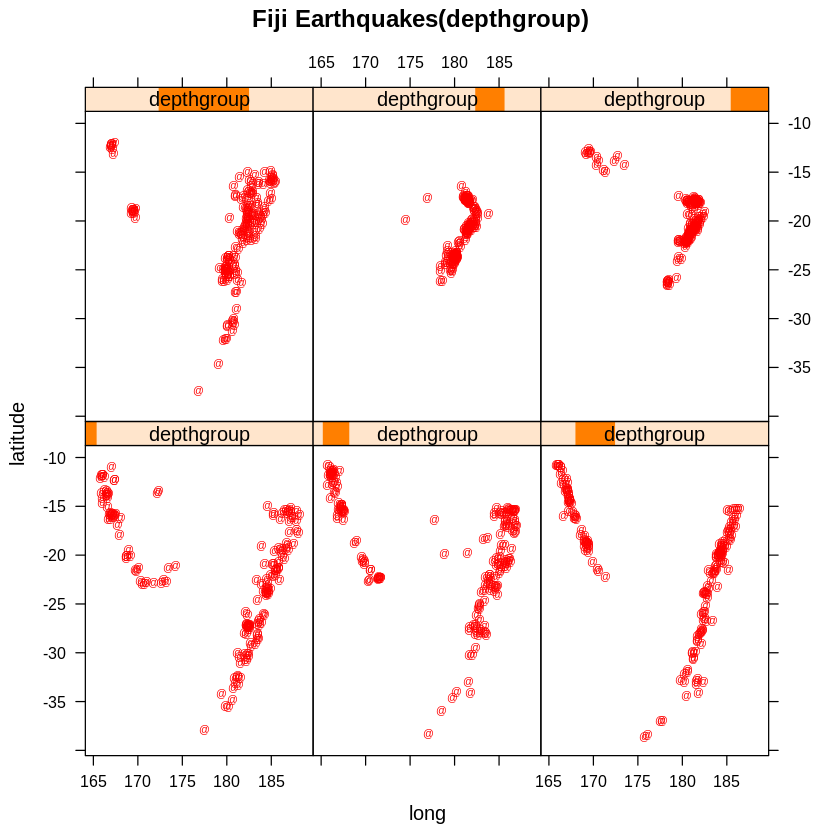

In [62]:
xyplot(lat ~ long | depthgroup, data = quakes, main = "Fiji Earthquakes(depthgroup)",
       ylab = "latitude", xlan = "longitude", pch = "@", col = "red" )

In [63]:
# 수심과 리히터 규모 변수를 동시에 작용하여 산점도 그리기
# 1) 리히터 규모를 2개 영역으로 구분
magnitudegroup <- equal.count(quakes$mag, number = 2, overlap = 0)
magnitudegroup


Data:
   [1] 4.8 4.2 5.4 4.1 4.0 4.0 4.8 4.4 4.7 4.3 4.4 4.6 4.4 4.4 6.1 4.3 6.0 4.5
  [19] 4.4 4.4 4.5 4.2 4.4 4.7 5.4 4.0 4.6 5.2 4.5 4.4 4.6 4.7 4.8 4.0 4.5 4.3
  [37] 4.5 4.6 4.1 4.4 4.7 4.6 4.4 4.3 4.6 4.9 4.5 4.4 4.3 5.1 4.2 4.0 4.6 4.3
  [55] 4.2 4.4 4.5 4.0 4.4 4.3 4.7 4.1 5.0 4.6 4.9 4.7 4.1 5.0 4.5 5.5 4.0 4.5
  [73] 4.3 5.2 4.4 4.3 4.1 4.5 4.2 5.3 5.2 4.5 4.6 4.3 4.0 4.3 4.7 4.5 4.2 4.3
  [91] 5.1 4.7 5.2 4.2 4.2 4.0 4.5 5.2 5.1 4.7 4.1 4.6 4.7 4.7 4.6 4.2 4.4 4.6
 [109] 5.7 5.0 4.5 4.2 4.0 4.8 4.4 4.2 5.3 4.7 4.8 4.2 4.8 4.3 4.7 4.5 4.4 5.1
 [127] 4.2 5.0 4.8 4.3 4.5 4.2 4.5 4.6 4.3 4.7 5.1 4.6 4.9 4.2 4.6 4.0 5.0 4.4
 [145] 4.2 4.2 4.4 4.9 5.3 4.0 5.7 6.4 4.3 4.2 4.7 4.7 4.2 4.3 4.9 4.6 4.1 4.8
 [163] 4.6 4.6 4.8 5.0 5.6 5.3 4.7 4.5 4.3 4.6 4.1 4.1 4.1 5.7 5.0 4.5 4.1 4.6
 [181] 4.5 4.3 4.4 4.2 4.1 4.9 4.3 4.9 4.6 4.6 5.3 4.7 4.6 4.1 4.6 4.2 4.6 4.5
 [199] 4.3 5.2 4.3 4.0 4.7 4.5 4.5 4.3 5.2 4.5 4.7 4.2 4.7 4.3 4.1 5.4 4.3 4.3
 [217] 4.2 4.6 4.4 4.2 4.7 4.6 4.9 4.2 4.5 4.

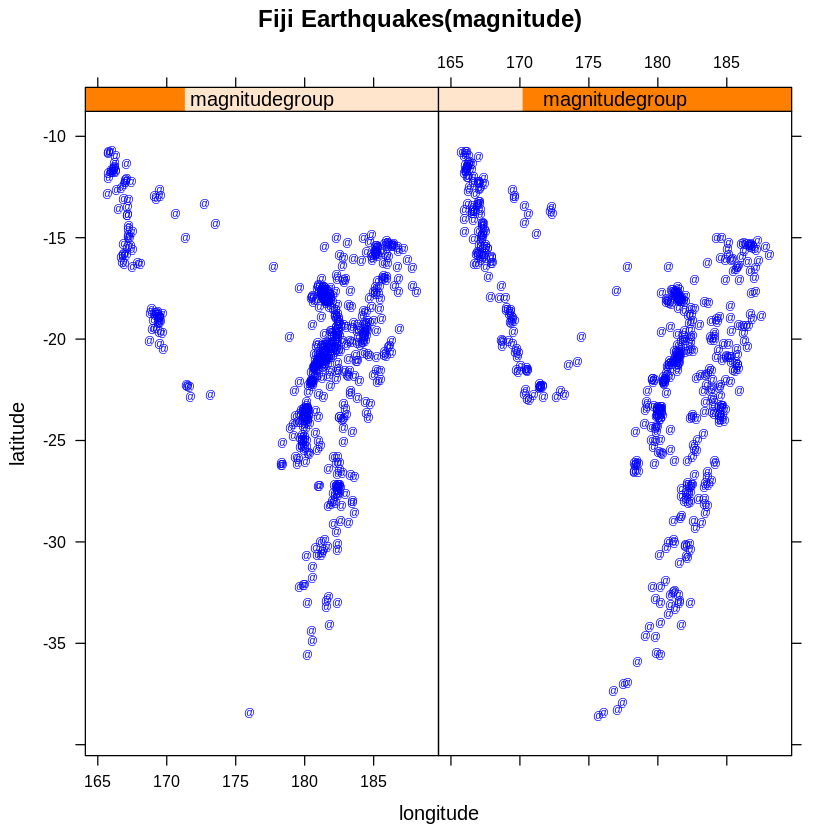

In [64]:
# 2) magnitudegroup 변수를 기준으로 산점도 그리기
xyplot(lat ~ long | magnitudegroup, data = quakes, main = "Fiji Earthquakes(magnitude)",
       ylab = "latitude", xlab = "longitude", pch = "@", col="blue" )

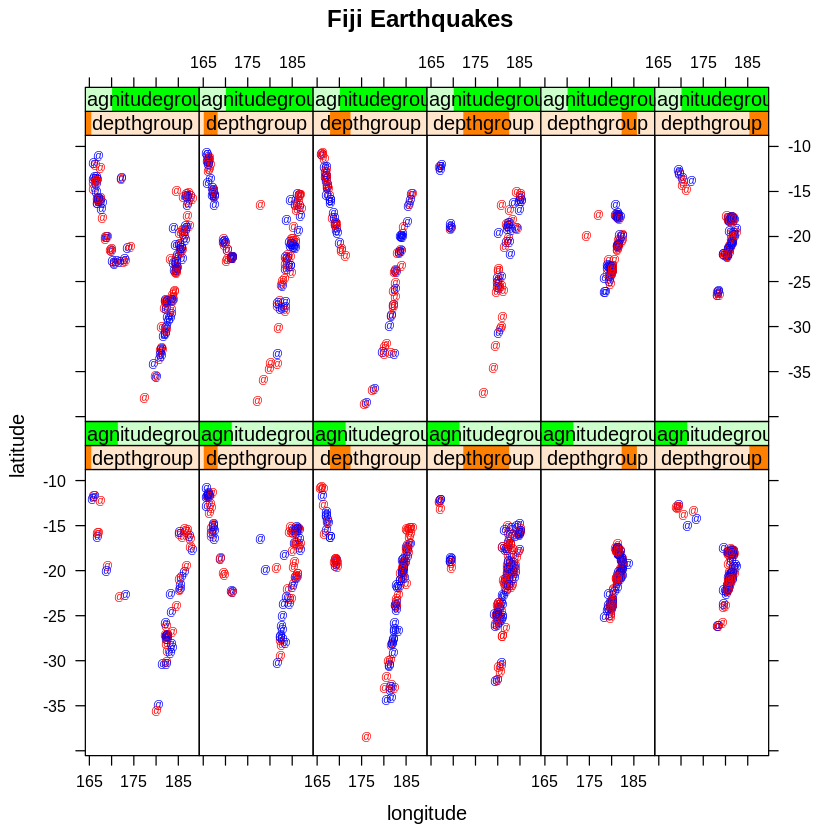

In [65]:
# 3) 수심과 리히터 규모를 동시에 표현(2행 5렬 패널 구현)
xyplot(lat ~ long | depthgroup * magnitudegroup, data = quakes, main = "Fiji Earthquakes",
       ylab = "latitude", xlab = "longitude", pch = "@", col = c("red","blue")) # 수심(빨강), 리히터 규모(파랑)

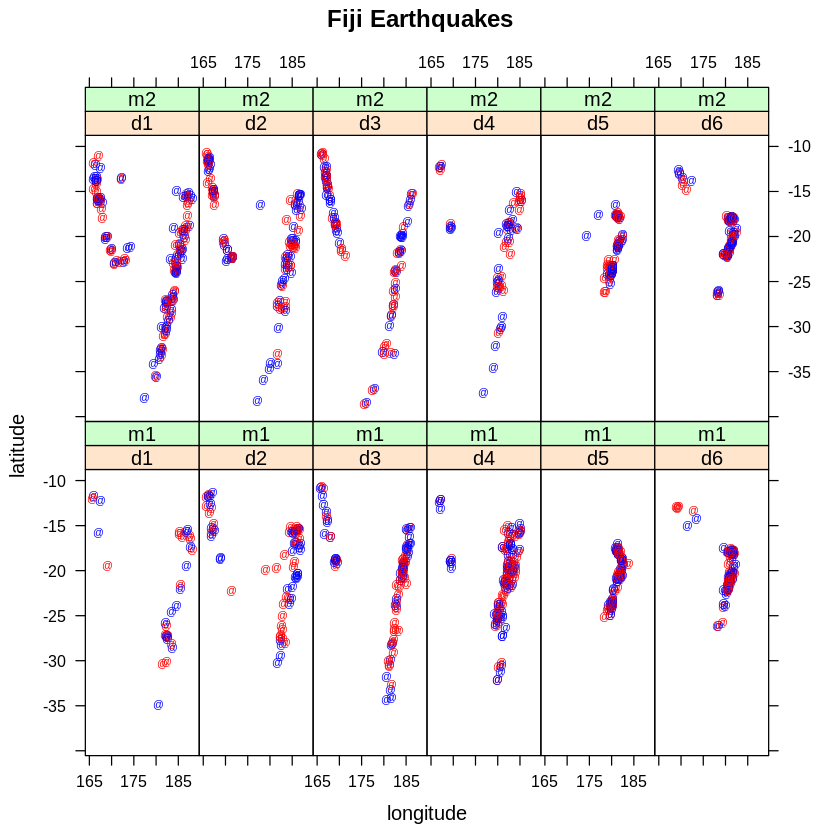

In [68]:
# 이산형 변수를 리코딩한 뒤에 Factor 형으로 변환하여 산점도
# 1) depth 변수 리코딩(equal.count() 대신 직접 범주화)
quakes$depth3[quakes$depth >= 39.5 & quakes$depth <= 69.5] <- 'd1'
quakes$depth3[quakes$depth >= 68.5 & quakes$depth <= 139.5] <- 'd2'
quakes$depth3[quakes$depth >= 138.5 & quakes$depth <= 246.5] <- 'd3'
quakes$depth3[quakes$depth >= 247.5 & quakes$depth <= 498.5] <- 'd4'
quakes$depth3[quakes$depth >= 497.5 & quakes$depth <= 576.5] <- 'd5'
quakes$depth3[quakes$depth >= 575.5 & quakes$depth <= 680.5] <- 'd6'

# 2) mag 변수 리코딩 (equal.count() 대신 직접 범주화)
quakes$mag3[quakes$mag >= 3.95 & quakes$mag <= 4.65] <- 'm1'
quakes$mag3[quakes$mag >= 4.55 & quakes$mag <= 6.45] <- 'm2'

# 3) factor형 변환
convert <- transform(quakes, depth3 = factor(depth3), mag3 = factor(mag3))

# 4) 산점도 그래프 그리기
xyplot(lat ~ long | depth3 * mag3, data = convert, main = "Fiji Earthquakes",
       ylab = "latitude", xlab = "longitude", pch="@", col = c("red","blue") )

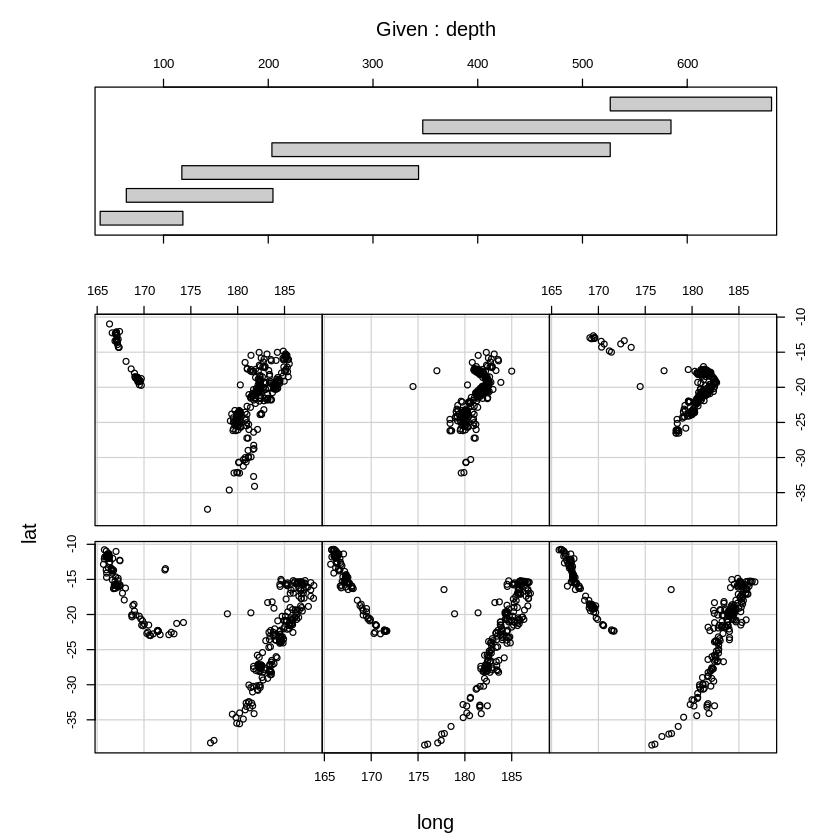

In [71]:
# 조건 그래프 : 조건 a에 의해서 x에 대한 y 그래프를 그림
# 조건 변수의 값을 일정한 구간으로 범주화하여 조건 그래프를 그림
# 조건에 대한 별도의 패널을 제공하여 구간의 크기와 구간의 겹침 정도를 시각화하여
# 조건에 의한 변하를 상세하게 제공해 줌
# coplot(y축 컬럼 ~ x축 컬럼 | 조건컬럼, data)
coplot(lat ~ long | depth, data = quakes)

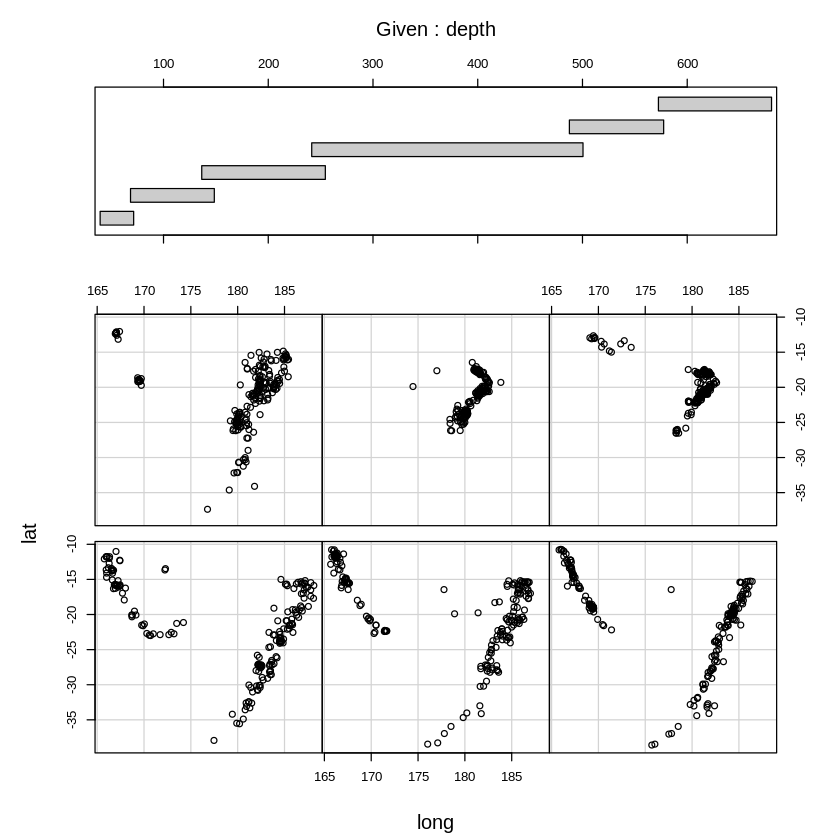

In [72]:
# 조건의 구간 막대가 0.1 단위로 겹쳐 범주화
coplot(lat ~ long | depth, data = quakes, overlap = 0.1)

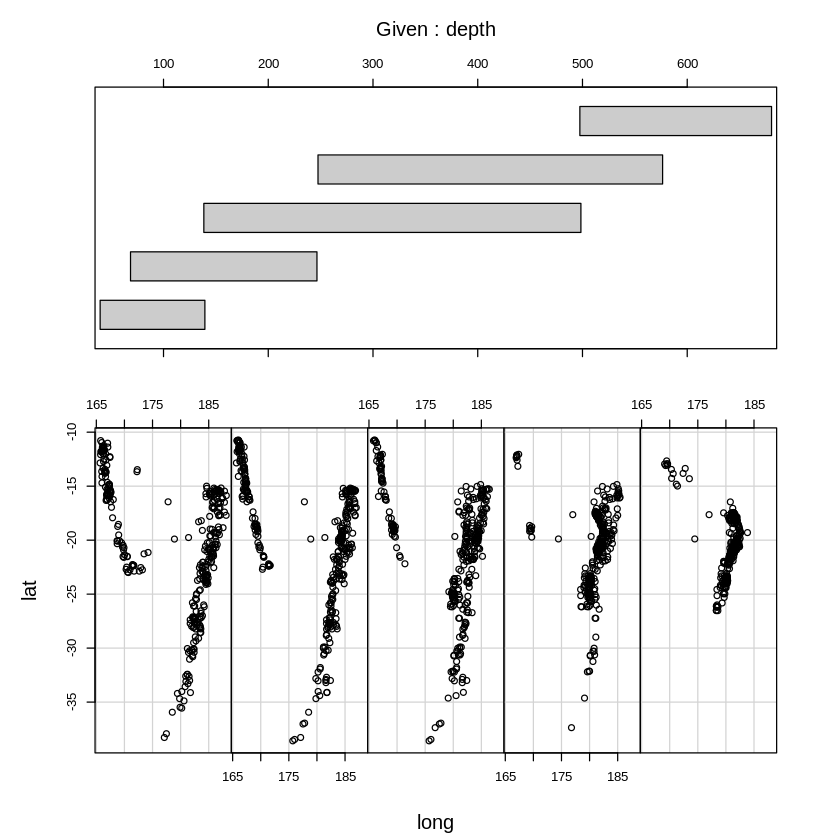

In [74]:
# 조건의 구간을 5개로 지정하고, 1행 5열의 패널로 조건 그래프 작성
coplot(lat ~ long | depth, data = quakes, number = 5, row = 1)

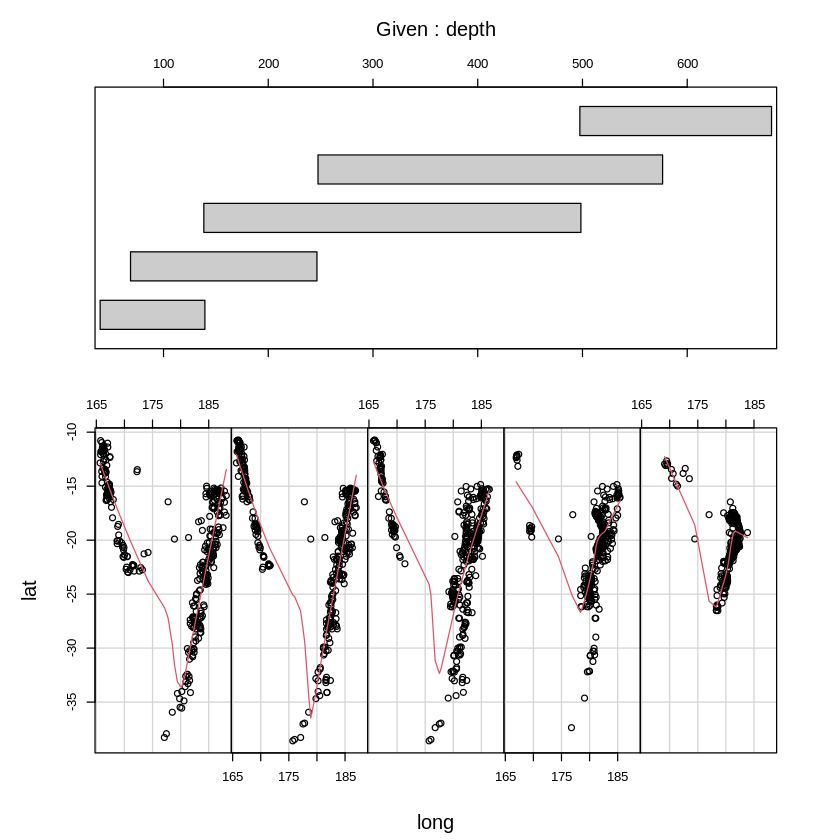

In [75]:
# 패널과 조건 막대에 색을 적용하여 조건 그래프 그리기
coplot(lat ~ long | depth, data = quakes, number = 5, row =1, panel = panel.smooth)

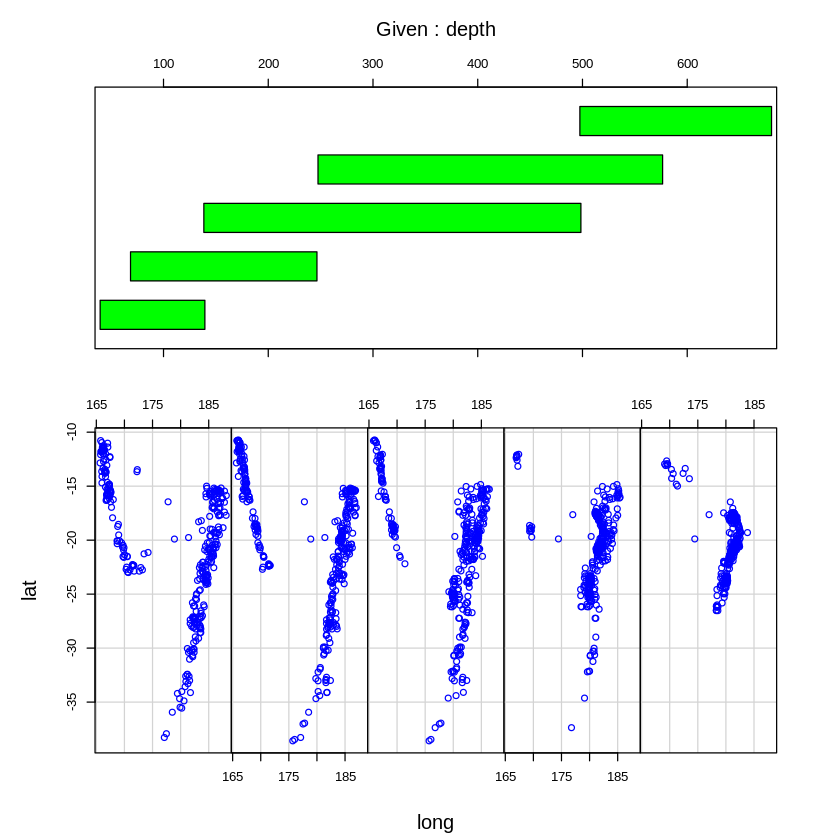

In [76]:
# 패널 영역과 조건 막대에 색상 적용
coplot(lat ~ long | depth, data = quakes, number = 5, row =1, col = 'blue', bar.bg = c(num = 'green'))

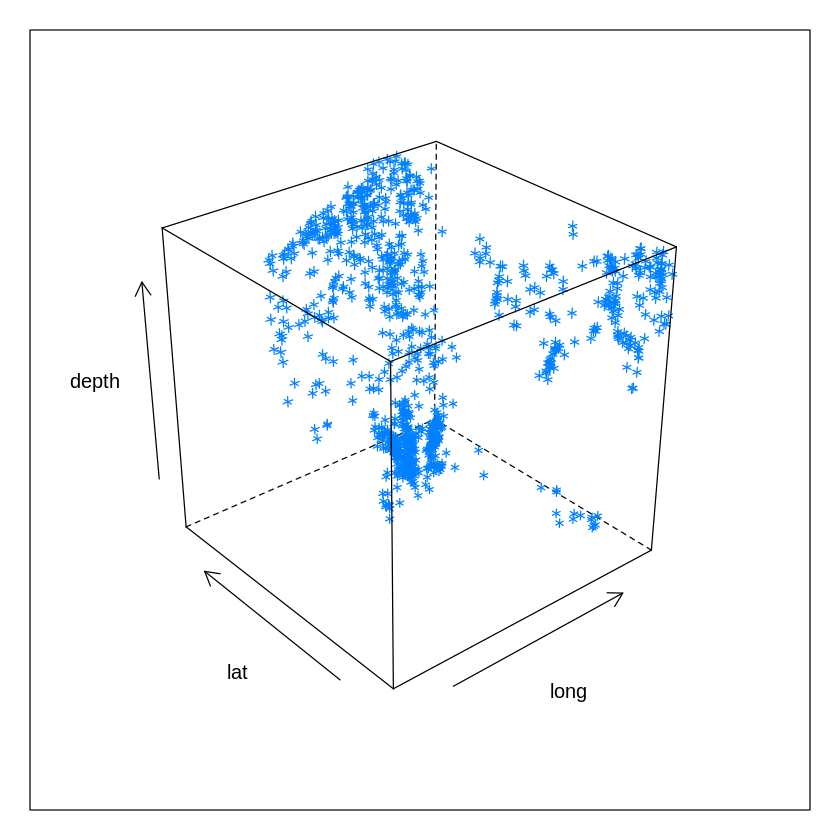

In [78]:
# 3차원 산점도 그래프
# cloud(z축 변수 ~ y축 변수 * x축 변수, data)
cloud(depth ~ lat * long, data = quakes, zlim = rev(range(quakes$depth)),
       xlab = "long", ylab = "lat", zlab = "depth")

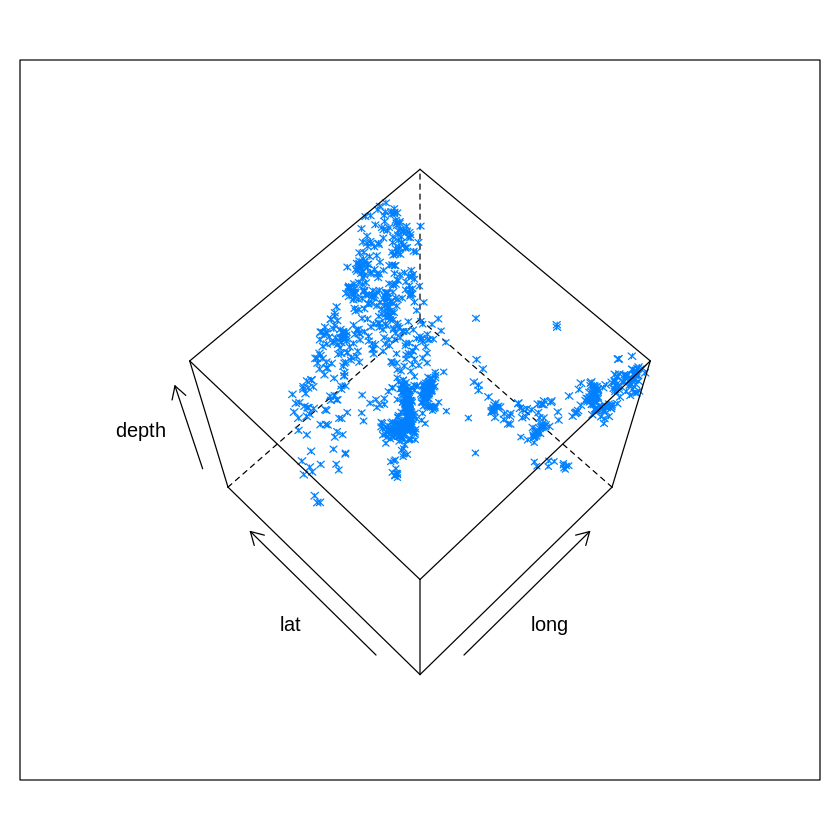

In [79]:
cloud(depth ~ lat * long, data = quakes, zlim = rev(range(quakes$depth)),
      panel.aspect = 0.9, screen = list(z=45, x=-25), 
      xlab = "long", ylab = "lat", zlab = "depth")